In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./heros.csv', encoding='gb18030')

# 需要处理的特征字段
features = [u'最大生命', u'生命成长', u'初始生命', u'最大法力', u'法力成长', u'初始法力', u'最高物攻', u'物攻成长', u'初始物攻', u'最大物防', u'物防成长', u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]

# 处理带有百分号的 '最大攻速' 字段，将其转换为浮点数
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)

# 处理分类字段 '攻击范围'
data[u'攻击范围'] = data[u'攻击范围'].map({'远程': 1, '近战': 0})

C:\Users\97059\AppData\Local\Temp\ipykernel_20072\3019722480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)
C:\Users\97059\AppData\Local\Temp\ipykernel_20072\3019722480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[u'攻击范围'] = data[u'攻击范围'].map({'远程': 1, '近战': 0})


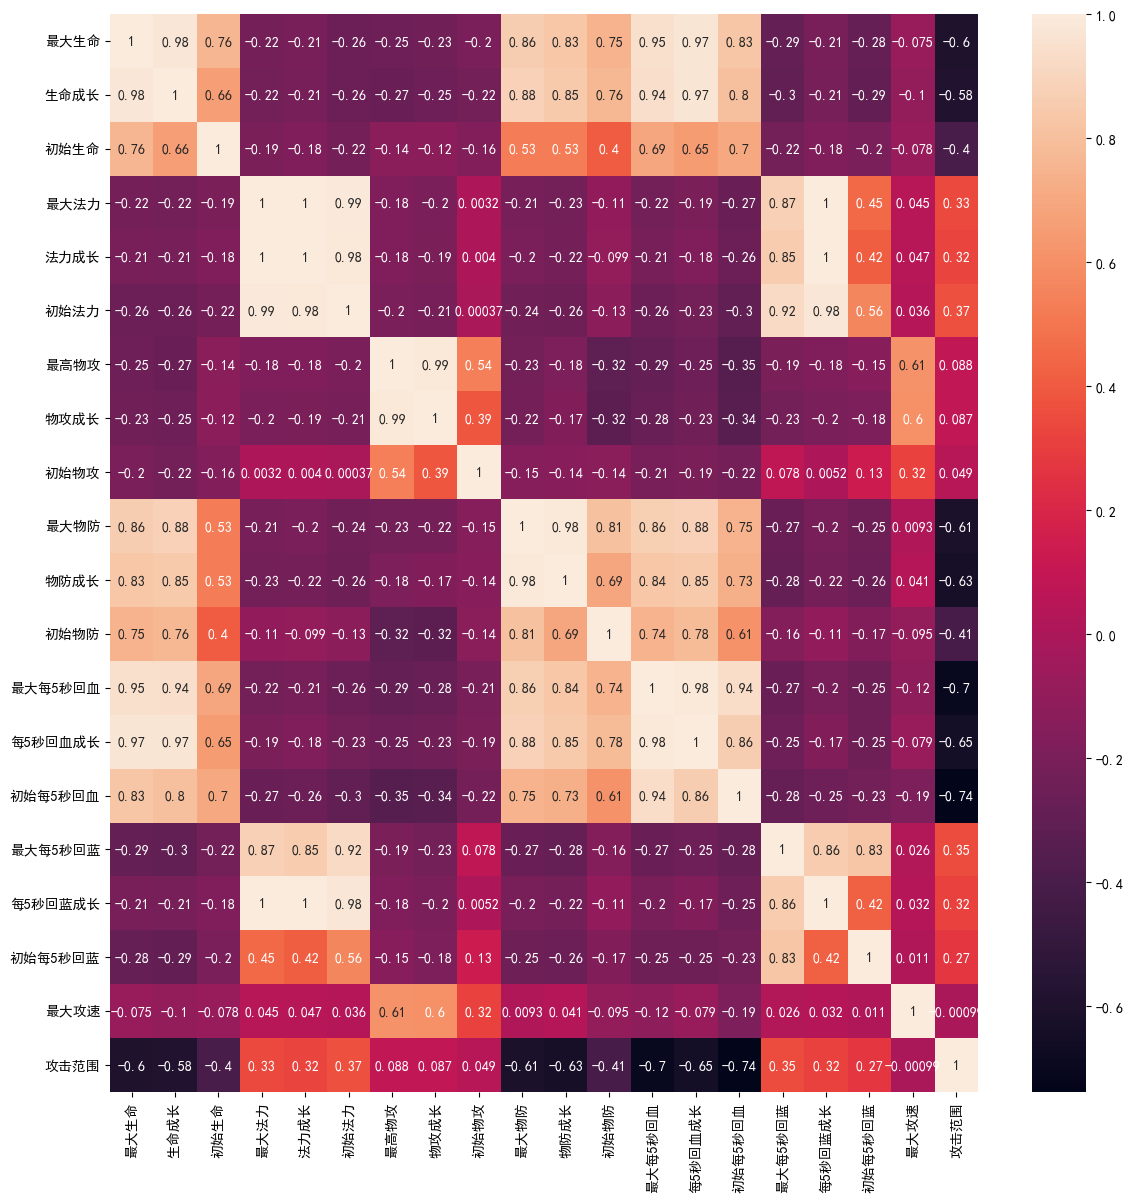

In [3]:
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 用热力图呈现 features 字段之间的相关性
corr = data.corr()
plt.figure(figsize=(14, 14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [4]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]

# 再次处理 '最大攻速' 和 '攻击范围' 字段
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程': 1, '近战': 0})

# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)

C:\Users\97059\AppData\Local\Temp\ipykernel_20072\1457006241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) else x)
C:\Users\97059\AppData\Local\Temp\ipykernel_20072\1457006241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[u'攻击范围'] = data[u'攻击范围'].map({'远程': 1, '近战': 0})


In [5]:
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)

# 训练数据
prediction = gmm.predict(data)
print(prediction)

[20  1 11  6  2  2 16 11  6  1 14 25  6  1 28 14 24  6  9 12 22  4 12  4
  4  4 12 15  3 21  1 29  8  3 21 29  3  5 17 26  8  3  3 29 29 26 25 17
 25  3 18 10  9 23 23 20 24 10 19  9 24 27 13 20  7 10 10  0 15]


D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False, sep=',')


In [8]:
# 计算并输出 Calinski-Harabasz 指数
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(data, prediction))

21.08219645558065
